## Using Google Object Detection API for detecting objects in images

Adapted from Tensorflow's <a herf='https://github.com/tensorflow/models/blob/master/research/object_detection/object_detection_tutorial.ipynb'>Object Detection Tutorial</a>

### Import Libraries

In [1]:
#Import libraries..
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

### Setup Environment

In [2]:
# This is needed to display the images.
%matplotlib inline

### Import Models

The models were downloaded from: <a href="https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md">Tensorflow's Object Detection API</a>  

In [3]:
MODEL_MOBILENET = './models/ssd_mobilenet_v1.pb'
MODEL_INCEPTION = './models/ssd_inception_v2.pb'

### Load a (frozen) model

In [4]:
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(MODEL_INCEPTION, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

### Load labels

In [5]:
#Import helper function
from utils import create_label_map 

#Set #label and path to labels 
LABELS_PATH = './data/mscoco_label_map.pbtxt'
NUM_CLASSES = 90

#Creating mapping from integer index --> String Name
label_map = create_label_map.load_labelmap(LABELS_PATH)
print (label_map)
    
#label_map = label_map_util.load_labelmap(LABELS_PATH)
#categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
#category_index = label_map_util.create_category_index(categories)

{1: {'name': 'person', 'id': 1}, 2: {'name': 'bicycle', 'id': 2}, 3: {'name': 'car', 'id': 3}, 4: {'name': 'motorcycle', 'id': 4}, 5: {'name': 'airplane', 'id': 5}, 6: {'name': 'bus', 'id': 6}, 7: {'name': 'train', 'id': 7}, 8: {'name': 'truck', 'id': 8}, 9: {'name': 'boat', 'id': 9}, 10: {'name': 'traffic light', 'id': 10}, 11: {'name': 'fire hydrant', 'id': 11}, 13: {'name': 'stop sign', 'id': 13}, 14: {'name': 'parking meter', 'id': 14}, 15: {'name': 'bench', 'id': 15}, 16: {'name': 'bird', 'id': 16}, 17: {'name': 'cat', 'id': 17}, 18: {'name': 'dog', 'id': 18}, 19: {'name': 'horse', 'id': 19}, 20: {'name': 'sheep', 'id': 20}, 21: {'name': 'cow', 'id': 21}, 22: {'name': 'elephant', 'id': 22}, 23: {'name': 'bear', 'id': 23}, 24: {'name': 'zebra', 'id': 24}, 25: {'name': 'giraffe', 'id': 25}, 27: {'name': 'backpack', 'id': 27}, 28: {'name': 'umbrella', 'id': 28}, 31: {'name': 'handbag', 'id': 31}, 32: {'name': 'tie', 'id': 32}, 33: {'name': 'suitcase', 'id': 33}, 34: {'name': 'frisbee

### Helper to load image into numpy array

In [6]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

### Helper to get objects detected from label_map

In [16]:
def query_map(label_map, classes):
    class_names = []
    for c in classes:
        if c in label_map.keys():
                label = label_map[c]['name']
        else:
                label = 'N/A'
        class_names.append(label) 
    return class_names    

### Detection

In [17]:
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.

import os 
from utils import visualization_utils as vis_util


PATH_TO_TEST_IMAGES_DIR = './testImages'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.jpg'.format(i)) for i in range(1, 3)]

# Size, in inches, of the output images.
IMAGE_SIZE = (8, 4)

[ 100.]
[ 100.]


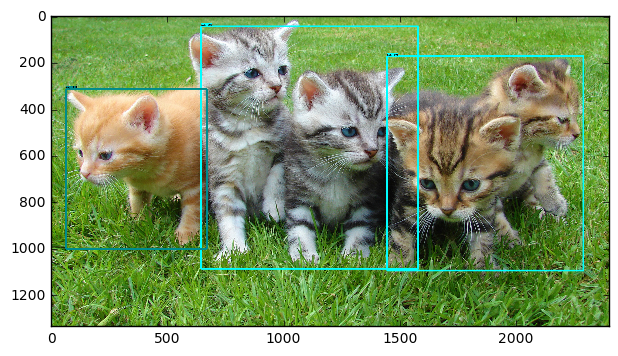

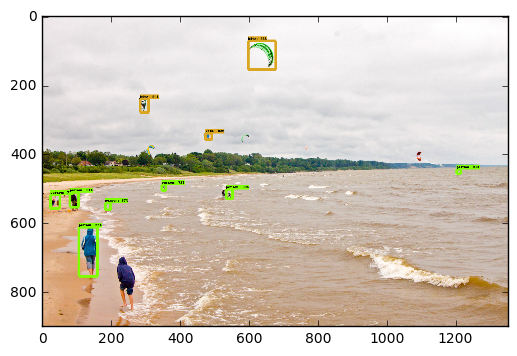

In [20]:
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        # Definite input and output Tensors for detection_graph
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        # Each box represents a part of the image where a particular object was detected.
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        # Each score represent how level of confidence for each of the objects.
        # Score is shown on the result image, together with the class label.
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        for image_path in TEST_IMAGE_PATHS:
            image = Image.open(image_path)
            # the array based representation of the image will be used later in order to prepare the
            # result image with boxes and labels on it.
            image_np = load_image_into_numpy_array(image)
            # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
            image_np_expanded = np.expand_dims(image_np, axis=0)
            # Actual detection.
            (boxes, scores, classes, num) = sess.run(
                [detection_boxes, detection_scores, detection_classes, num_detections],
                feed_dict={image_tensor: image_np_expanded})
            # Visualization of the results of a detection.
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                label_map,
                use_normalized_coordinates=True,
                line_thickness=8)
             

            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_np)
            
            #Get CLass Names:
            print (num)
